In [2]:
print("BST")
from utils import draw_tree

BST


In [3]:
class Node:
    def __init__(self, value) -> None:
        self.value = value
        self.left = None
        self.right = None

In [4]:
class BinarySearchTree:
    def __init__(self, root_value) -> None:
        self.root = Node(root_value)

    def insert(self, value):
        self._insert_recursively(self.root, value)

    # Helper method for insertion
    # BST Rule: Smaller values go Left, Larger (or equal) values go Right
    def _insert_recursively(self, curr_node, value):
        if value < curr_node.value:
            # Go to left
            if curr_node.left is None:
                # Found it. Create the node here.
                curr_node.left = Node(value)
            else:
                # Continue searching down the left subtree
                self._insert_recursively(curr_node.left, value)
        else:
            # Go to right (handles value > current and duplicates)
            if curr_node.right is None:
                # Found it.
                curr_node.right = Node(value)
            else:
                # Continue searching down the right subtree
                self._insert_recursively(curr_node.right, value)

    # In-order: Left -> Root -> Right
    # Gives an ascending sorted list from the BST
    def in_order_traversal(self, start_node, visit_list):
        if start_node is None:
            return
        # 1. Go to left subtree
        self.in_order_traversal(start_node.left, visit_list)
        # 2. Visit the Node (Process data)
        visit_list.append(start_node.value)
        # 3. Go to right subtree
        self.in_order_traversal(start_node.right, visit_list)

    # Iterative Search
    # Time Complexity:
    #   - Average: O(log n) (We discard half the tree at every step)
    #   - Worst: O(n) (If tree is unbalanced, looking like a linked list)
    def search(self, value):
        curr = self.root
        while curr is not None:  # While we have a Node
            if value == curr.value:
                return True
            elif value < curr.value:
                # Target is smaller, so it must be in the Left subtree
                # Reassign the left Node to curr
                curr = curr.left
            else:
                # Target is larger, so it must be in the Right subtree
                curr = curr.right

        return False

    # Wrapper for delete
    def delete(self, value):
        # update self.root because the root itself might be the node deleted
        self.root = self._delete_recursively(self.root, value)

    # Returns the node that should take the place of 'curr_node'
    def _delete_recursively(self, curr_node, value):
        # Base case: Value not found in tree
        if curr_node is None:
            return None

        # Step 1: Find the node to delete
        if value < curr_node.value:
            # Search left, and update left child with result of recursive call
            curr_node.left = self._delete_recursively(curr_node.left, value)

        elif value > curr_node.value:
            # Search right, and update right child with result
            curr_node.right = self._delete_recursively(curr_node.right, value)

        else:
            # Step 2: Found val to delete! Now handle the 3 deletion cases.

            # Case 1: Node has no children (Leaf node)
            # Action: Just remove it (return None to parent)
            if curr_node.left is None and curr_node.right is None:
                curr_node = None

            # Case 2: Node has only ONE child
            # Action: Bypass the current node. Return the existing child to the parent.
            elif curr_node.left is None:
                # Only has right child, so right child takes its place
                curr_node = curr_node.right
            elif curr_node.right is None:
                # Only has left child, so left child takes its place
                curr_node = curr_node.left

            # Case 3: Node has TWO children
            # Action: We cannot just delete it. We must find a replacement that maintains BST order.
            # Strategy: Find the "In-Order Successor" (Smallest node in the Right Subtree)
            else:
                # 3a. Find smallest node in right sub-tree
                successor = curr_node.right
                while successor.left is not None:
                    successor = successor.left

                # 3b. Replace current node's value with successor's value
                # (We copy the data rather than moving the actual node object)
                curr_node.value = successor.value

                # 3c. Delete the original successor node from the right subtree
                # (Since we moved its value up here, the old duplicate must go)
                curr_node.right = self._delete_recursively(
                    curr_node.right, successor.value
                )

        return curr_node

IN ORDER VISITS OF BST:  [3, 25, 27, 34, 42, 50, 72, 123]
Is 60 in tree?:  False


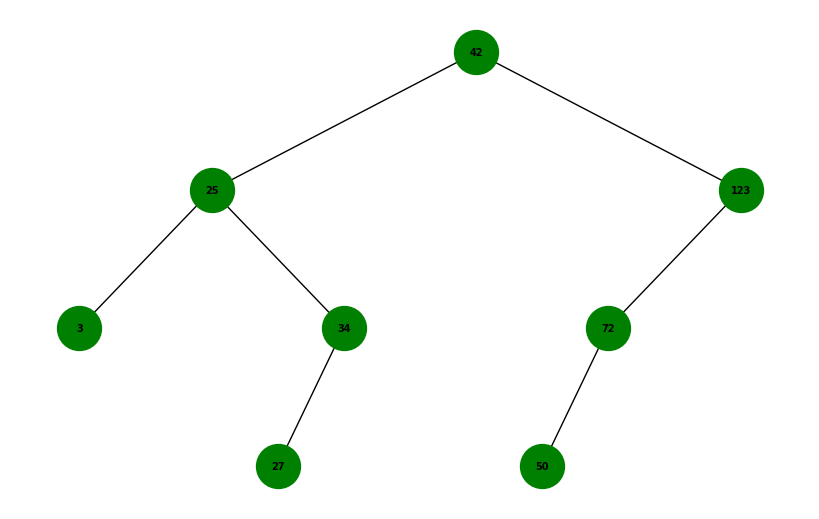

In [5]:
bst = BinarySearchTree(42)
bst.insert(25)
bst.insert(123)
bst.insert(3)
bst.insert(34)

bst.insert(72)
bst.insert(50)
bst.insert(27)
# bst.delete(25)
visit_list = []
bst.in_order_traversal(bst.root, visit_list)
print("IN ORDER VISITS OF BST: ", visit_list)

search_val = 60

print(f"Is {search_val} in tree?: ", bst.search(search_val))

draw_tree(bst)

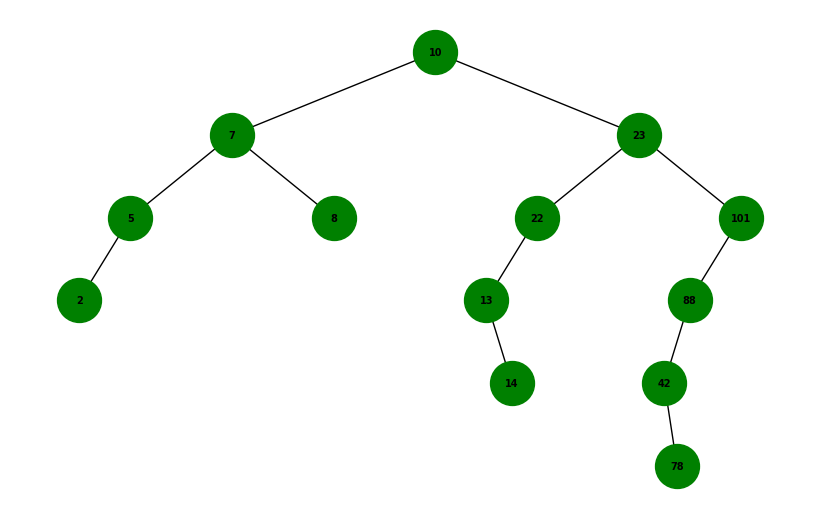

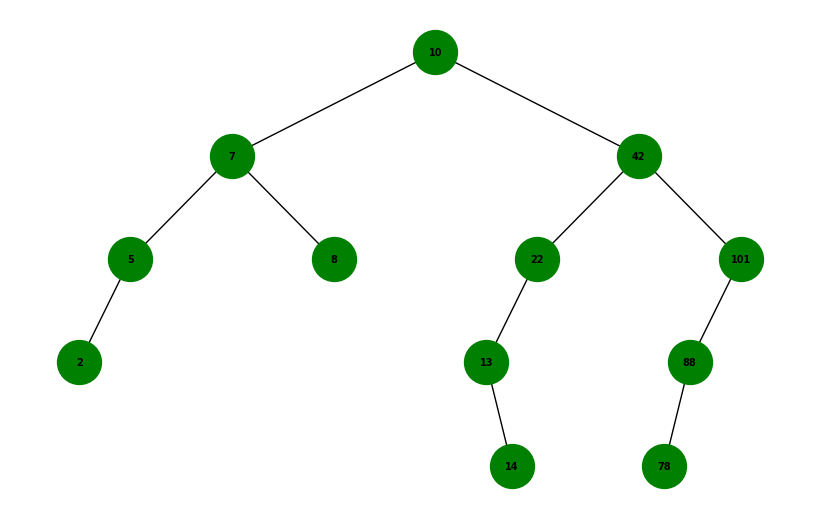

In [11]:
avl = BinarySearchTree(10)


avl.insert(7)
avl.insert(5)
avl.insert(23)
avl.insert(22)
avl.insert(13)
avl.insert(101)
avl.insert(88)
avl.insert(42)
avl.insert(78)
avl.insert(2)
avl.insert(8)
avl.insert(14)

draw_tree(avl)

avl.delete(23)


draw_tree(avl)